In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Comparison of long-read aligner performance when mapping split-reads

In [3]:
path='/home/vanda/Documents/split_reads2/short'
bwa = pd.read_csv(f"{path}/bwa.mappings_labelled.csv", sep = '\t')
#bwa_dodi = pd.read_csv(f"{path}/bwa_dodi.mappings_labelled.csv", sep = '\t')
minimap2 = pd.read_csv(f"{path}/minimap2.mappings_labelled.csv", sep = '\t')
#minimap2_dodi = pd.read_csv(f"{path}/minimap2_dodi.mappings_labelled.csv", sep = '\t')
lastal = pd.read_csv(f"{path}/lastal.mappings_labelled.csv", sep = '\t')
lastalsplit = pd.read_csv(f"{path}/lastalsplit.mappings_labelled.csv", sep = '\t')
lastal_lastsplit = pd.read_csv(f"{path}/lastal_lastsplit.mappings_labelled.csv", sep = '\t')
#last_dodi = pd.read_csv(f"{path}/lastal_dodi.mappings_labelled.csv", sep = '\t')
#ngmlr=pd.read_csv(f"{path}/ngmlr.mappings_labelled.csv", sep = '\t')
# vacmap=pd.read_csv(f"{path}/vacmap.mappings_labelled.csv", sep = '\t')

In [23]:
data = {'bwa':bwa, 'minimap2':minimap2, 'lastal':lastal, 'lastalsplit':lastalsplit, 'lastal_lastsplit':lastal_lastsplit}

for name, df in data.items():
    bins = []
    base = 30
    for i in df['aln_size']:
        bins.append(base * round(i/base))
    data[name] = df.assign(bins=bins)

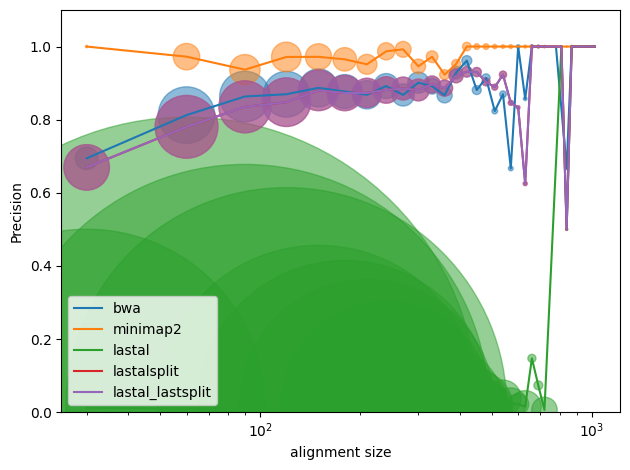

In [24]:
for name, df in data.items():
    bin_precision = []
    bin_id = []
    s = []
    for bid, b in df.groupby('bins'):
        s.append(len(b))
        bin_precision.append(b['tp'].sum() / (b['tp'].sum() + b['fp'].sum()))
        bin_id.append(bid)    

    plt.plot(bin_id, bin_precision, label=name)
    plt.scatter(bin_id, bin_precision, s=s, alpha=0.5)

plt.legend()
plt.xscale("log")
plt.xlabel('alignment size')
plt.ylabel('Precision')
plt.ylim(0, 1.1)
plt.tight_layout()
#plt.savefig(path + '/size_vs_precision.pdf')
plt.show()

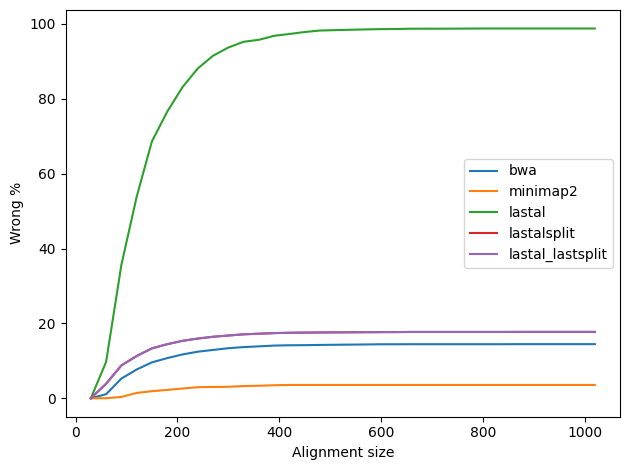

In [25]:
for name, df in data.items():
    bin_wrong = []
    bin_w = []
    wrong = 0
    for bid, b in df.groupby('bins'):
        bin_wrong.append(wrong / len(df) * 100)
        bin_w.append(bid)
        wrong += len(b) - b['tp'].sum()
    plt.plot(bin_w, bin_wrong, label = name)

plt.legend()
plt.xlabel('Alignment size')
plt.ylabel('Wrong %')
plt.tight_layout()
#plt.savefig(prefix + 'ins_size_vs_wrong.pdf')
plt.show()

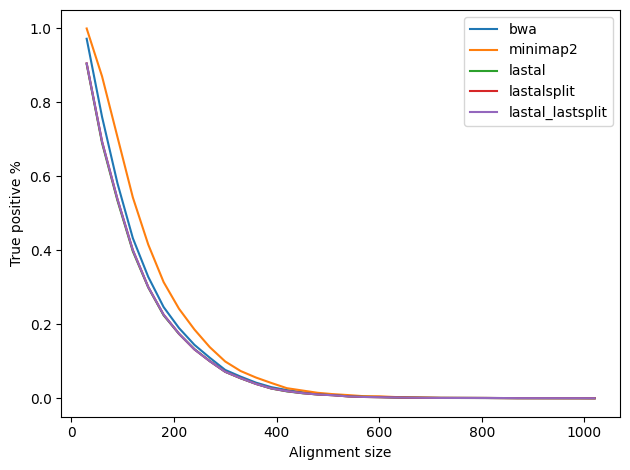

In [26]:
for name, df in data.items():
    bin_tp = []
    bin_t = []
    t = df['tp'].sum()
    for bid, b in df.groupby('bins'):
        t -= b['tp'].sum()
        bin_tp.append(t / df['tp'].sum())
        bin_t.append(bid)

    plt.plot(bin_t, bin_tp, label = name)

plt.legend()
plt.xlabel('Alignment size')
plt.ylabel('True positive %')
plt.tight_layout()
#plt.savefig(prefix + 'ins_size_vs_wrong.pdf')
plt.show()

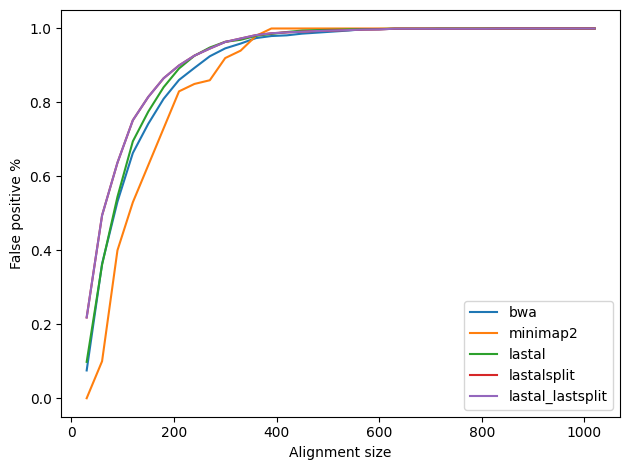

In [27]:
for name, df in data.items():
    bin_fp = []
    bin_f = []
    f = 0
    for bid, b in df.groupby('bins'):
        f += b['fp'].sum()
        bin_fp.append(f / df['fp'].sum())
        bin_f.append(bid)

    plt.plot(bin_f, bin_fp, label = name)

plt.legend()
plt.xlabel('Alignment size')
plt.ylabel('False positive %')
plt.tight_layout()
#plt.savefig(prefix + 'ins_size_vs_wrong.pdf')
plt.show()


In [28]:
plt.close()

In [ ]:
def precision_mapq(df):
    bin_precision = []
    bin_id = []
    s = []
    for bid, b in df.groupby('mapq'):
        s.append(len(b))
        bin_precision.append(b['tp'].sum() / (b['tp'].sum() + b['fp'].sum()))
        bin_id.append(bid)
    return bin_precision, bin_id, s

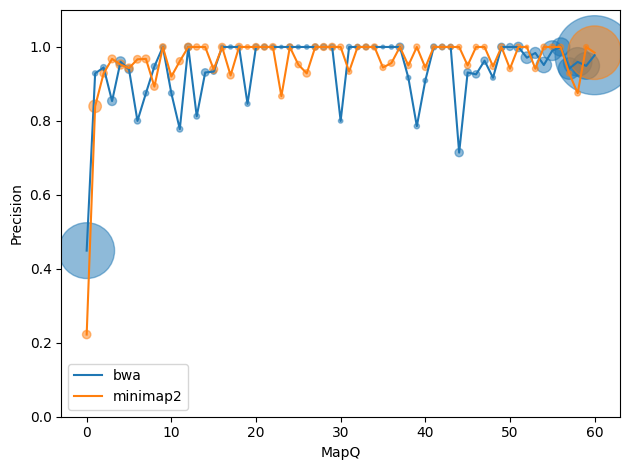

In [33]:
data2 = {'bwa':bwa, 'minimap2':minimap2}
for name, df in data2.items():
    bin_precision = []
    bin_id = []
    s = []
    for bid, b in df.groupby('mapq'):
        s.append(len(b))
        bin_precision.append(b['tp'].sum() / (b['tp'].sum() + b['fp'].sum()))
        bin_id.append(bid)    


    plt.plot(bin_id, bin_precision, label=name)

    plt.scatter(bin_id, bin_precision, s=s, alpha=0.5)

plt.legend()
plt.xlabel('MapQ')
plt.ylabel('Precision')
plt.ylim(0, 1.1)
plt.tight_layout()
#plt.savefig(path + '/mapq_vs_precision.pdf')

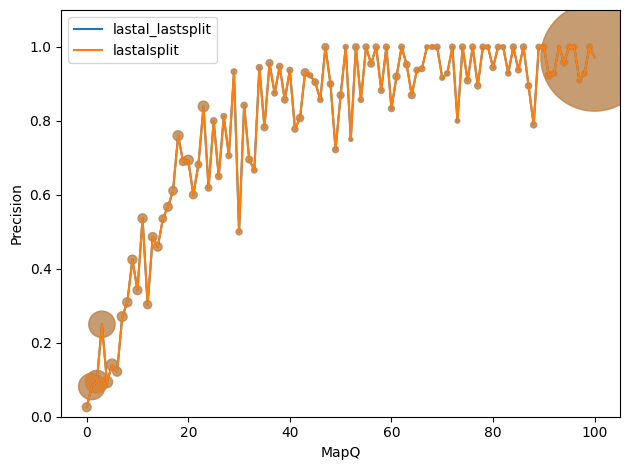

In [36]:
data3 = {'lastal_lastsplit':lastal_lastsplit, 'lastalsplit':lastalsplit}
for name, df in data3.items():
    bin_precision = []
    bin_id = []
    s = []
    for bid, b in df.groupby('mapq'):
        s.append(len(b))
        bin_precision.append(b['tp'].sum() / (b['tp'].sum() + b['fp'].sum()))
        bin_id.append(bid)    


    plt.plot(bin_id, bin_precision, label=name)

    plt.scatter(bin_id, bin_precision, s=s, alpha=0.5)

plt.legend()
plt.xlabel('MapQ')
plt.ylabel('Precision')
plt.ylim(0, 1.1)
plt.tight_layout()
#plt.savefig(path + '/mapq_vs_precision.pdf')